In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0-rc0'

In [27]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import data_tools

### Test our data_tools.py methods on a test image

In [82]:
test_filename = 'output1.tif'

test_data = data_tools.read_raster(test_filename)

In [83]:
test_data[0]

array([[18,  4,  7, ..., 29, 32, 36],
       [24, 10, 12, ..., 32, 32, 33],
       [27, 12, 13, ..., 35, 32, 30],
       ...,
       [20, 29, 27, ..., 24, 25, 22],
       [27, 35, 28, ..., 24, 26, 25],
       [41, 44, 30, ..., 24, 27, 27]], dtype=uint8)

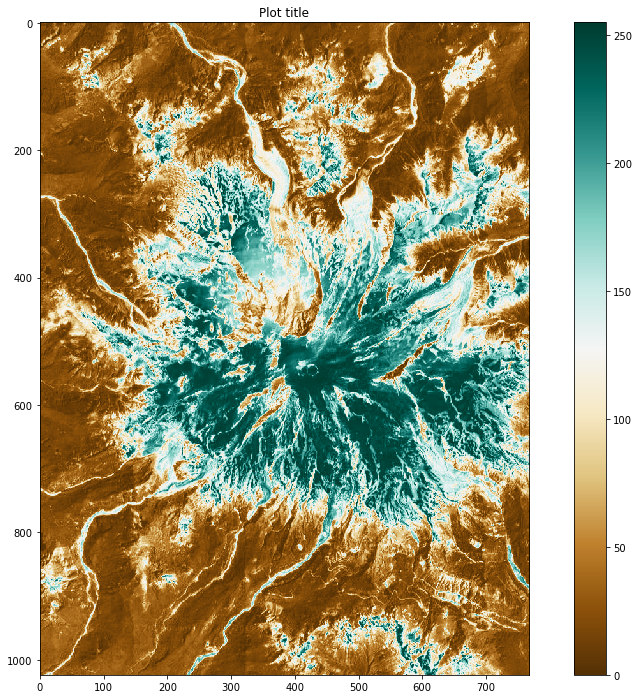

In [84]:
data_tools.plot_me(test_data[0], cmap='BrBG')

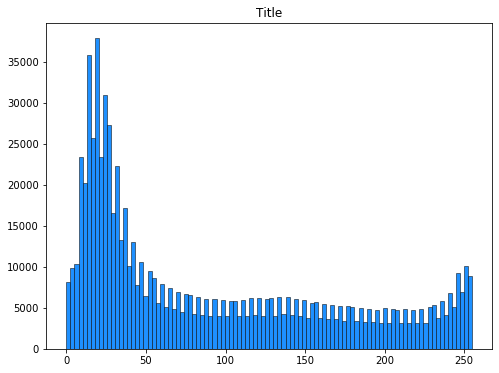

In [85]:
data_tools.histo_me(test_data[0])

In [86]:
mask = np.zeros(np.shape(test_data[0]))

In [87]:
print(np.shape(mask))

(1024, 768)


In [88]:
mask[np.where(test_data[0] > 180)] = 1

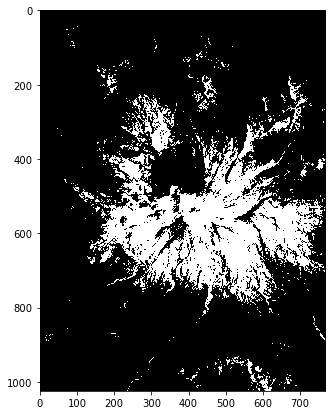

In [91]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(mask, cmap='binary_r')

plt.show()

### Now let's try this on real data:

Rough threshold values for snow:
- R > 1000, channel 2
- G > 1000, channel 1
- B > 1000, channel 0
- NIR < 100, channel 3

Reading in data will result in an array of the shape (4, 8000, 8000).

We are going to start with the green band where snow is the most reflective.

In [4]:
import os

In [5]:
data_dir = '../../data/'

filenames = os.listdir(data_dir)

In [6]:
filename_tifs = []

for filename in filenames:
    if filename.endswith('Analytic.tif'):
        filename_tifs.append(filename)

In [7]:
filename_tifs[:5]

['644798_1060618_2017-07-25_103d_BGRN_Analytic.tif',
 '2575093_1060719_2019-08-04_1039_BGRN_Analytic.tif',
 '2548533_1060719_2019-07-25_0f15_BGRN_Analytic.tif',
 '2574618_1060618_2019-08-04_0f3d_BGRN_Analytic.tif',
 '703947_1060718_2017-08-22_1035_BGRN_Analytic.tif']

In [32]:
filename = data_dir +  '2575093_1060719_2019-08-04_1039_BGRN_Analytic.tif'

data = data_tools.read_raster(filename, band=None)[0]

In [33]:
data.shape

(4, 8000, 8000)

In [65]:
np.shape(data)

(8000, 8000)

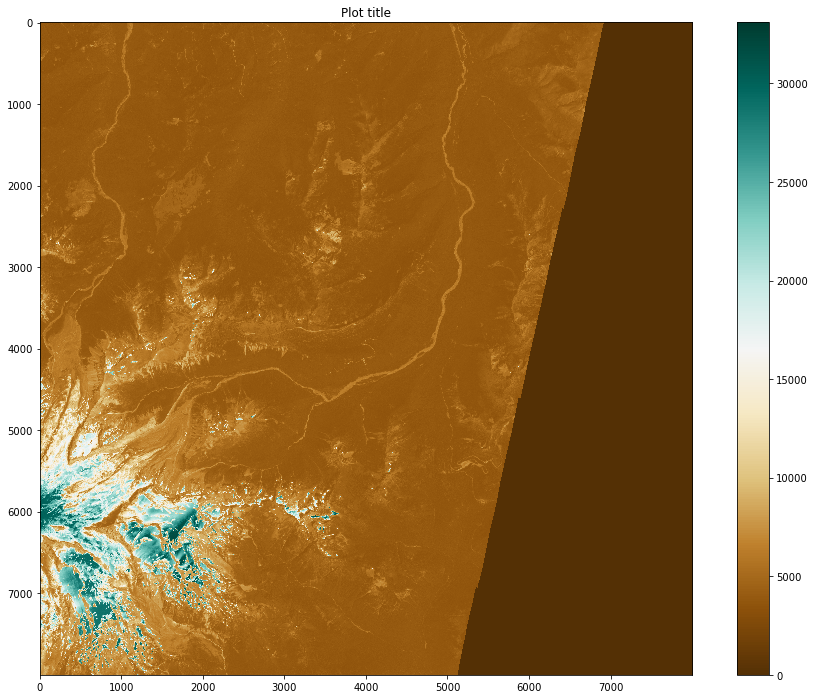

In [66]:
data_tools.plot_me(data, cmap='BrBG')

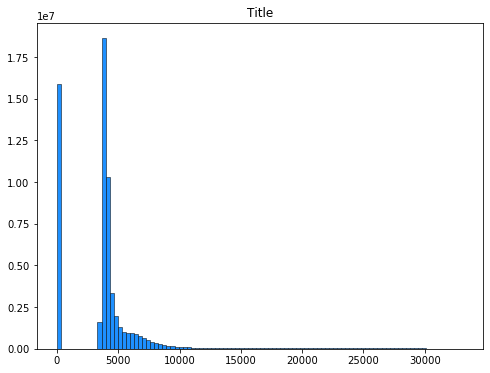

In [70]:
data_tools.histo_me(data[0])

In [80]:
mask = np.zeros(np.shape(data[0]))

mask[data[0] > 10000] = 1

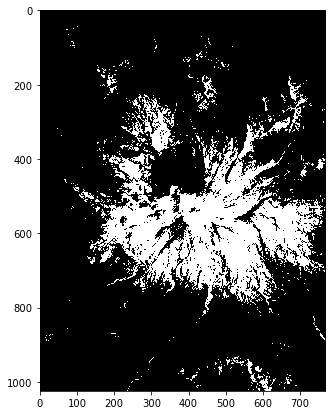

In [92]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(mask, cmap='binary_r')

plt.show()